# IMDB 5000 Movie Dataset Univariate Exploratory Analysis

================================================================================================================================

**AUTHOR**: Mengshan Jin

**CREATION DATE**: 07/26/2017

================================================================================================================================


**PROGRAM DESCRIPTION**: Exploratory data analysis on IMDB 5000 Movie Dataset

**INPUT DATASETS**: 01_Data/movie_metadata.csv

**OUTPUT DATASETS**: 


================================================================================================================================
**PROGRAM CHANGE HISTORY**

Date|Author|Change|
----|------|------|

# Section 0: Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from collections import Counter

# Section 1: Read data

In [2]:
imdb = pd.read_csv("../01_Data/movie_metadata.csv")

In [4]:
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [6]:
imdb.shape
# 5043 movies
# 28 attributes

(5043, 28)

In [23]:
sorted(imdb.columns)

['actor_1_facebook_likes',
 'actor_1_name',
 'actor_2_facebook_likes',
 'actor_2_name',
 'actor_3_facebook_likes',
 'actor_3_name',
 'aspect_ratio',
 'budget',
 'cast_total_facebook_likes',
 'color',
 'content_rating',
 'country',
 'director_facebook_likes',
 'director_name',
 'duration',
 'facenumber_in_poster',
 'genres',
 'gross',
 'imdb_score',
 'language',
 'movie_facebook_likes',
 'movie_imdb_link',
 'movie_title',
 'num_critic_for_reviews',
 'num_user_for_reviews',
 'num_voted_users',
 'plot_keywords',
 'title_year']

In [9]:
imdb['movie_imdb_link'].head()

0    http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1    http://www.imdb.com/title/tt0449088/?ref_=fn_t...
2    http://www.imdb.com/title/tt2379713/?ref_=fn_t...
3    http://www.imdb.com/title/tt1345836/?ref_=fn_t...
4    http://www.imdb.com/title/tt5289954/?ref_=fn_t...
Name: movie_imdb_link, dtype: object

### ==>Task to do<==
1. Scrape each IMDB links to get movie descriptions (storyline) -> Text mining -> DONE!!!
2. Scrape each IMDB links to get movie poster -> CNN; Clustering on styles, position of title, etc.

# Section 2: Basic summary statistics

## actor_1
### actor_1_name

In [29]:
imdb['actor_1_name'].value_counts(dropna=False)[:10]

Robert De Niro       49
Johnny Depp          41
Nicolas Cage         33
J.K. Simmons         31
Denzel Washington    30
Bruce Willis         30
Matt Damon           30
Liam Neeson          29
Steve Buscemi        27
Harrison Ford        27
Name: actor_1_name, dtype: int64

In [27]:
len(imdb['actor_1_name'].unique())
# 2098 unique actor 1

2098

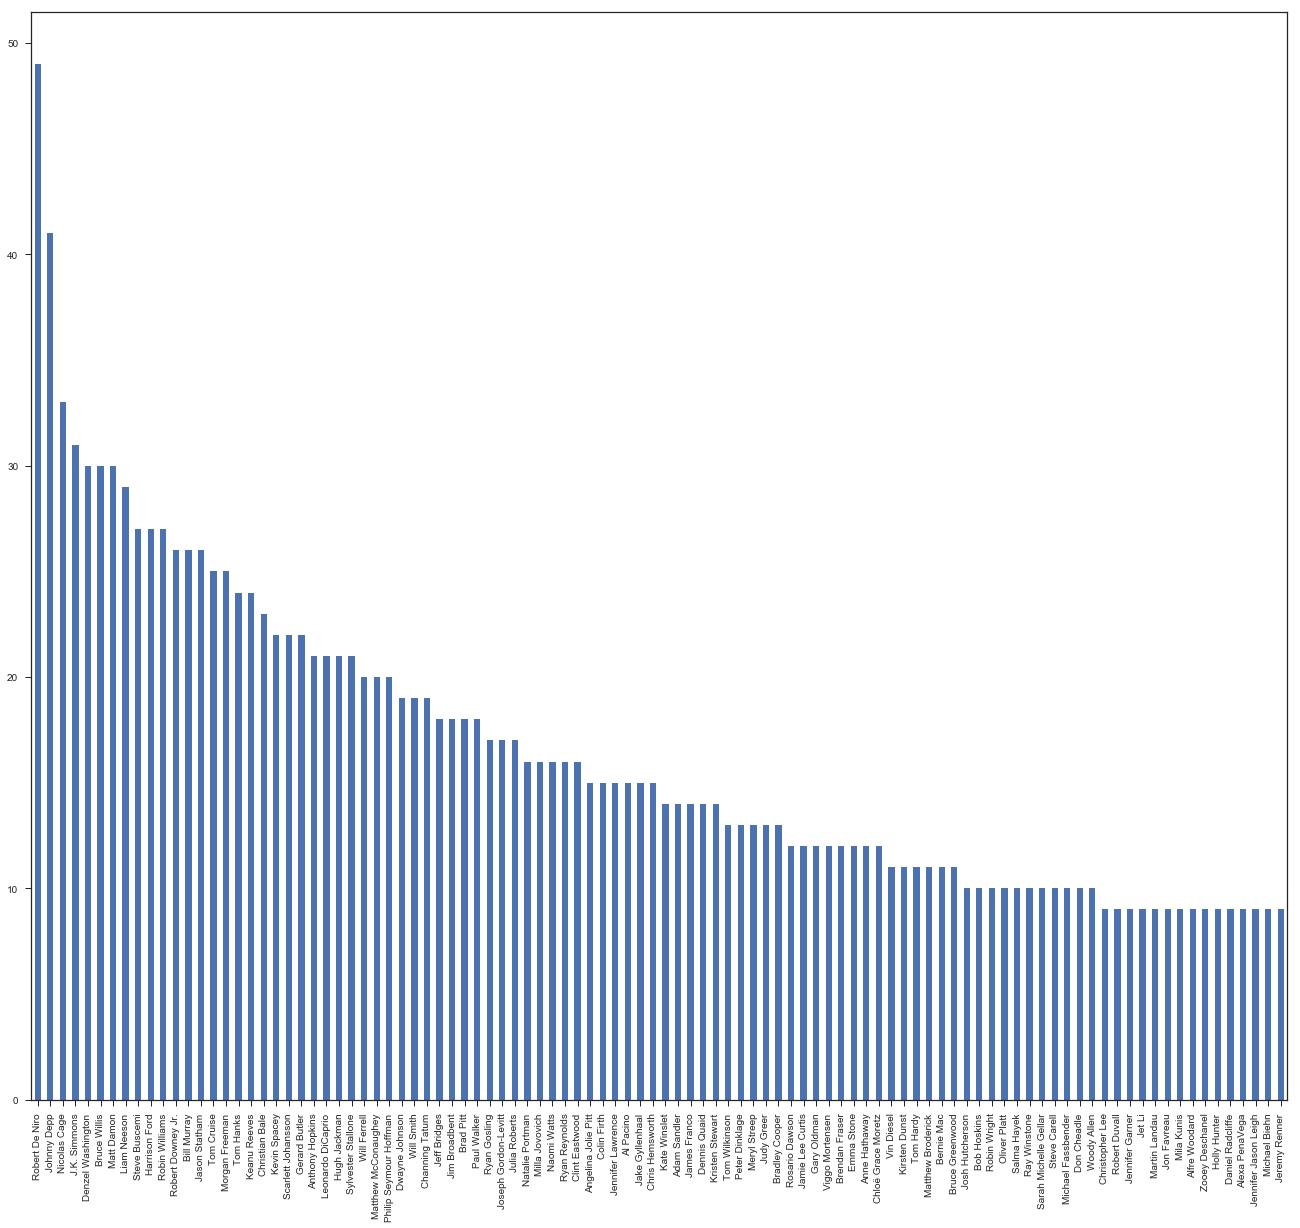

In [81]:
plt.figure(figsize=(25 * 0.9, 25 * 0.8))
imdb['actor_1_name'].value_counts(dropna=False)[:100].plot(kind="bar")

### actor_1_facebook_like

In [32]:
imdb['actor_1_facebook_likes'].describe()
# long tail
# spike at 0-1000

count      5036.000000
mean       6560.047061
std       15020.759120
min           0.000000
25%         614.000000
50%         988.000000
75%       11000.000000
max      640000.000000
Name: actor_1_facebook_likes, dtype: float64

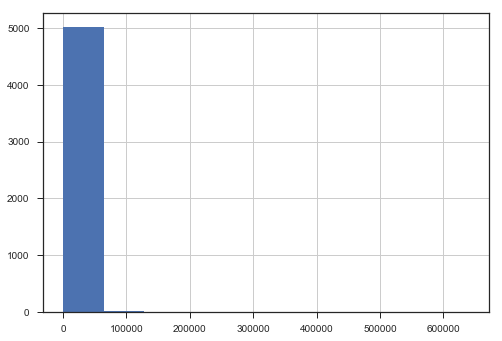

In [64]:
imdb['actor_1_facebook_likes'].hist()

In [37]:
len(imdb.loc[imdb['actor_1_facebook_likes'] > 10000])

1387

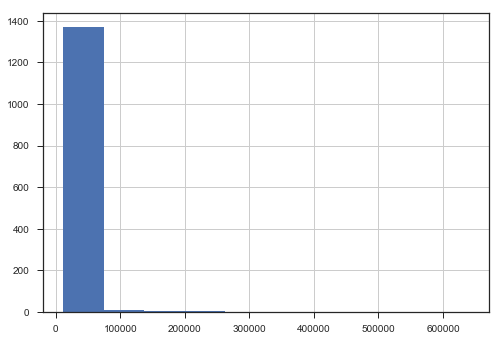

In [63]:
imdb.loc[imdb['actor_1_facebook_likes'] > 10000]['actor_1_facebook_likes'].hist()

In [41]:
len(imdb.loc[imdb['actor_1_facebook_likes'] > 20000])

429

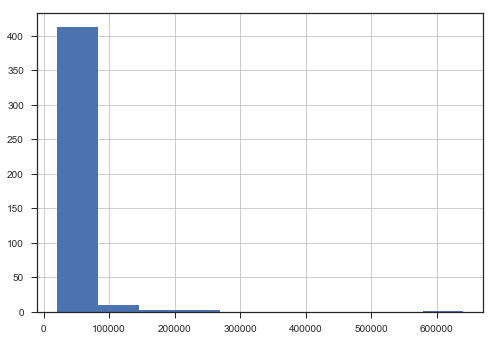

In [62]:
imdb.loc[imdb['actor_1_facebook_likes'] > 20000]['actor_1_facebook_likes'].hist()

## actor_2
### actor_2_name

In [43]:
imdb['actor_2_name'].value_counts(dropna=False)[:10]

Morgan Freeman     20
Charlize Theron    15
Brad Pitt          14
NaN                13
Meryl Streep       11
James Franco       11
Jason Flemyng      10
Adam Sandler       10
Judy Greer          9
Steve Buscemi       9
Name: actor_2_name, dtype: int64

In [44]:
len(imdb['actor_2_name'].unique())
# 3033 unique actor 2

3033

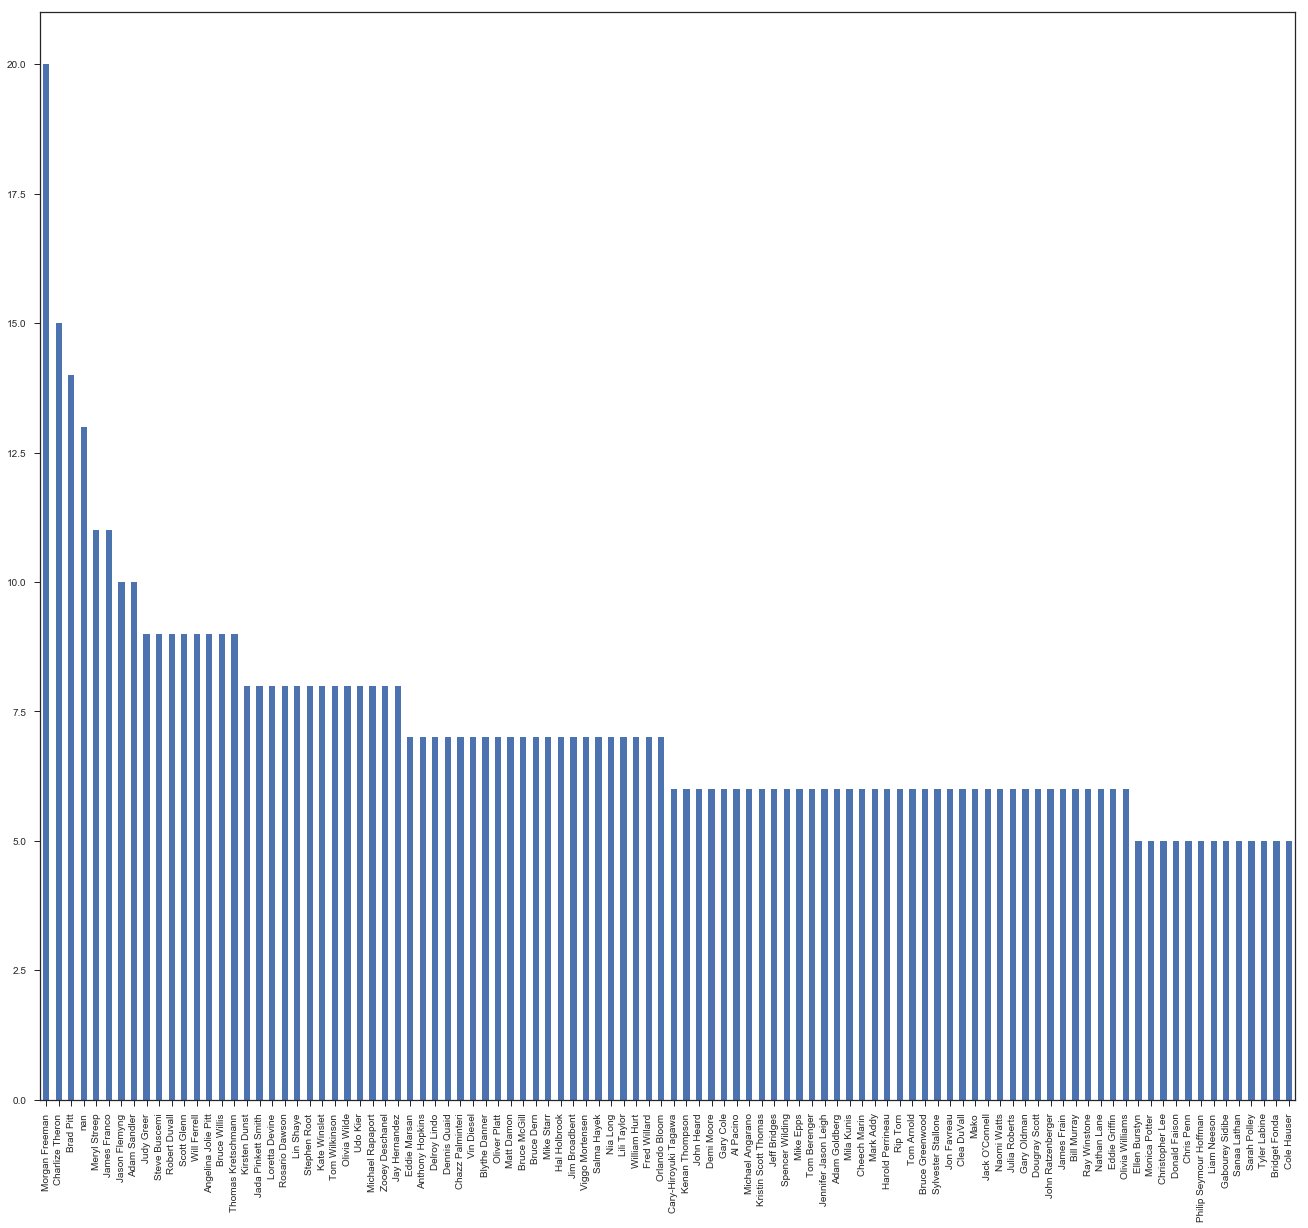

In [80]:
plt.figure(figsize=(25 * 0.9, 25 * 0.8))
imdb['actor_2_name'].value_counts(dropna=False)[:100].plot(kind="bar")

### actor_2_facebook_likes

In [49]:
imdb['actor_2_facebook_likes'].describe()

count      5030.000000
mean       1651.754473
std        4042.438863
min           0.000000
25%         281.000000
50%         595.000000
75%         918.000000
max      137000.000000
Name: actor_2_facebook_likes, dtype: float64

In [50]:
len(imdb.loc[imdb['actor_2_facebook_likes'] > 10000])

315

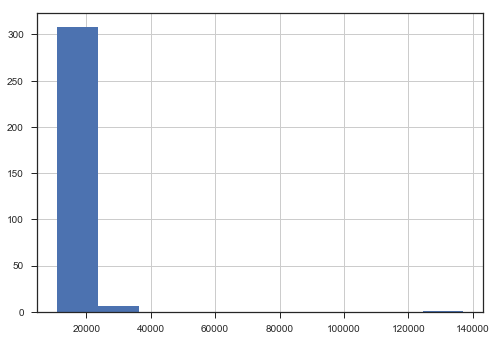

In [61]:
imdb.loc[imdb['actor_2_facebook_likes'] > 10000]['actor_2_facebook_likes'].hist()

## actor_3
### actor_3_name

In [54]:
imdb['actor_3_name'].value_counts(dropna=False)[:10]
# The most frequent is NaN...

NaN               23
Steve Coogan       8
Ben Mendelsohn     8
John Heard         8
Lois Maxwell       7
Sam Shepard        7
Kirsten Dunst      7
Robert Duvall      7
Stephen Root       7
Jon Gries          7
Name: actor_3_name, dtype: int64

In [55]:
len(imdb['actor_3_name'].unique())
# 3522 unique actor 3

3522

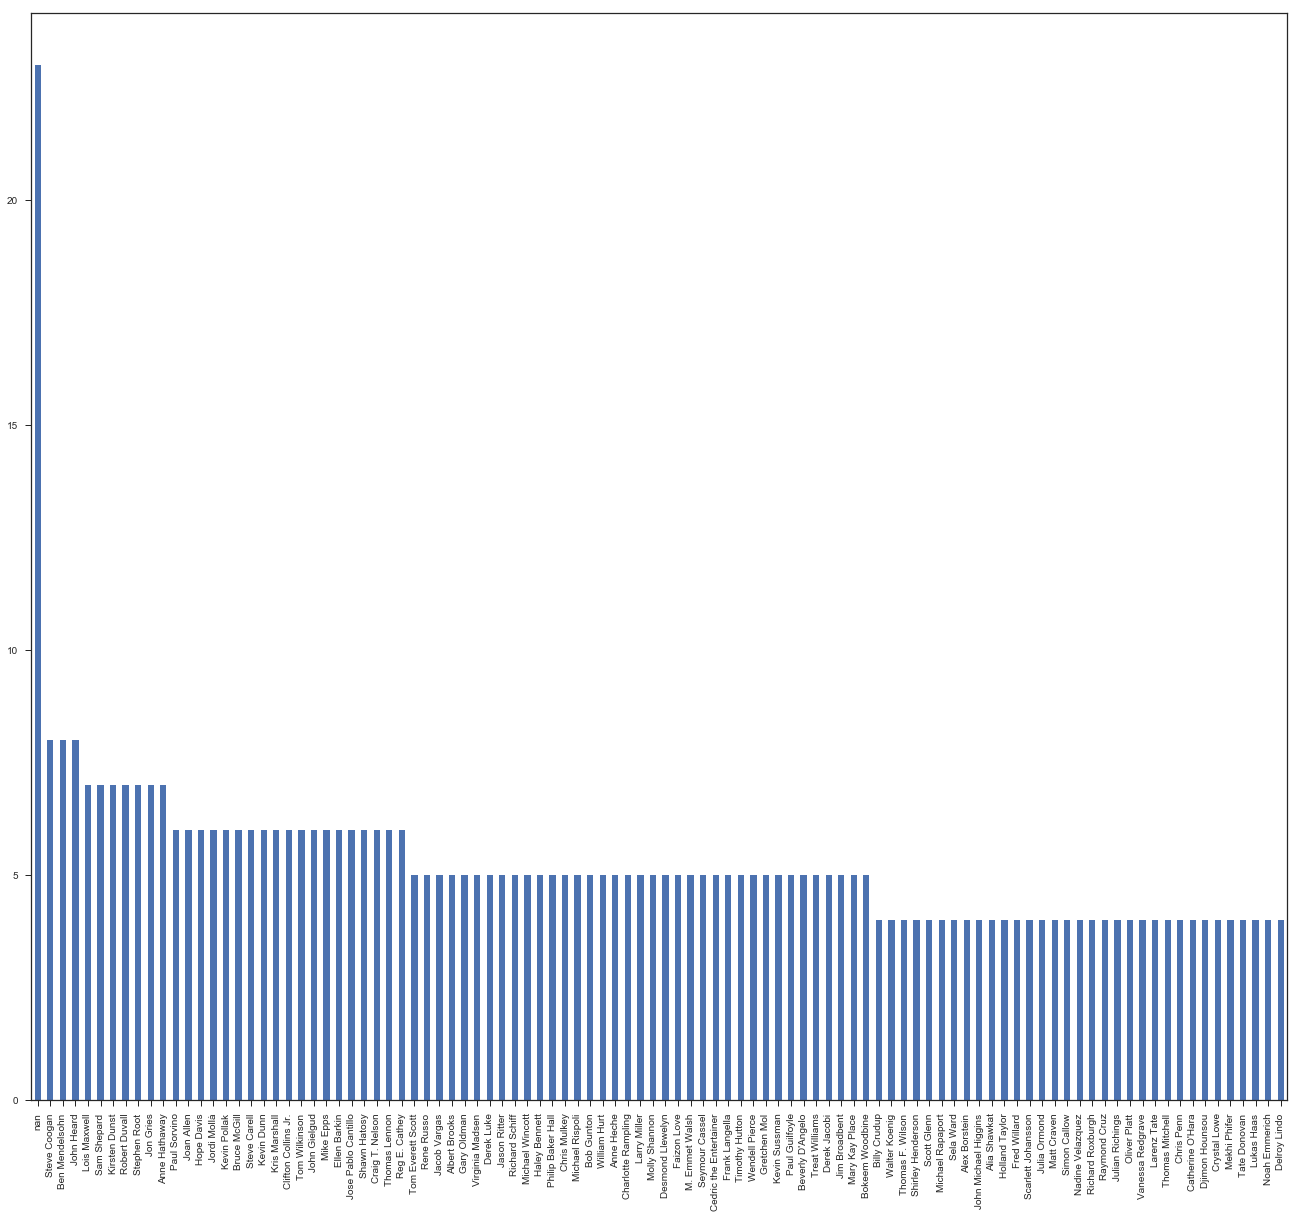

In [79]:
plt.figure(figsize=(25 * 0.9, 25 * 0.8))
imdb['actor_3_name'].value_counts(dropna=False)[:100].plot(kind="bar")

### ==>Task to do<==
Facet histogram on actor 1, 2, 3? Is it a good idea?

### actor_3_facebook_likes

In [58]:
imdb['actor_3_facebook_likes'].describe()

count     5020.000000
mean       645.009761
std       1665.041728
min          0.000000
25%        133.000000
50%        371.500000
75%        636.000000
max      23000.000000
Name: actor_3_facebook_likes, dtype: float64

In [59]:
len(imdb.loc[imdb['actor_3_facebook_likes'] > 10000])

61

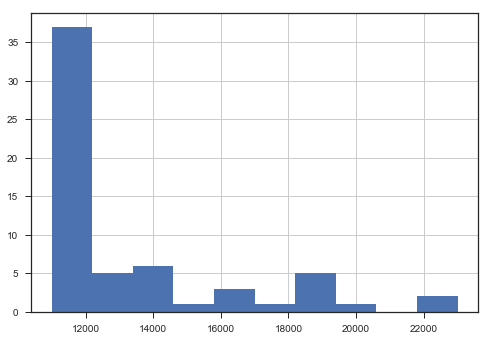

In [60]:
imdb.loc[imdb['actor_3_facebook_likes'] > 10000]['actor_3_facebook_likes'].hist()

## aspect_ratio

In [65]:
imdb['aspect_ratio'].describe()

count    4714.000000
mean        2.220403
std         1.385113
min         1.180000
25%         1.850000
50%         2.350000
75%         2.350000
max        16.000000
Name: aspect_ratio, dtype: float64

In [68]:
len(imdb.loc[imdb['aspect_ratio'] == 16]['aspect_ratio'])
# How could aspect_raio is 16?! Does it mean the screen is 16 x 9?
# My guess is this variable is not consistent throughout the 100 years, so use it with cautious.

45

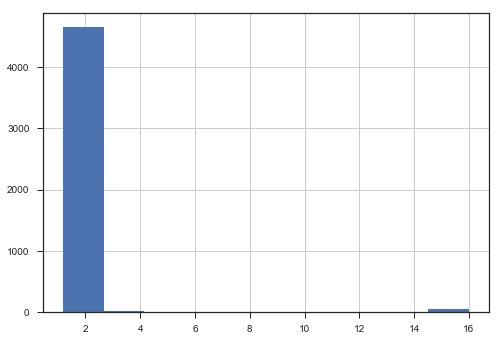

In [66]:
imdb['aspect_ratio'].hist()

## budget

In [69]:
imdb['budget'].describe()

count    4.551000e+03
mean     3.975262e+07
std      2.061149e+08
min      2.180000e+02
25%      6.000000e+06
50%      2.000000e+07
75%      4.500000e+07
max      1.221550e+10
Name: budget, dtype: float64

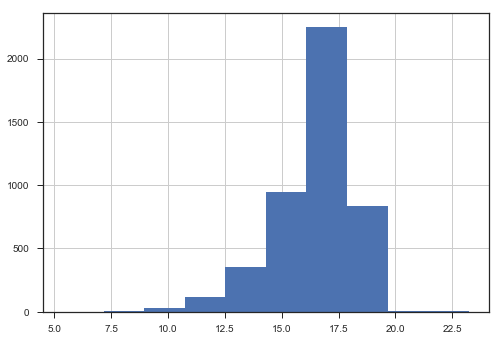

In [71]:
np.log(imdb['budget']).hist()

In [72]:
np.exp(17)
# around 20~30 million dollars

24154952.753575299

## cast_total_facebook_likes

In [73]:
imdb['cast_total_facebook_likes'].describe()

count      5043.000000
mean       9699.063851
std       18163.799124
min           0.000000
25%        1411.000000
50%        3090.000000
75%       13756.500000
max      656730.000000
Name: cast_total_facebook_likes, dtype: float64

In [75]:
len(imdb.loc[imdb['cast_total_facebook_likes'] > 10000])

1561

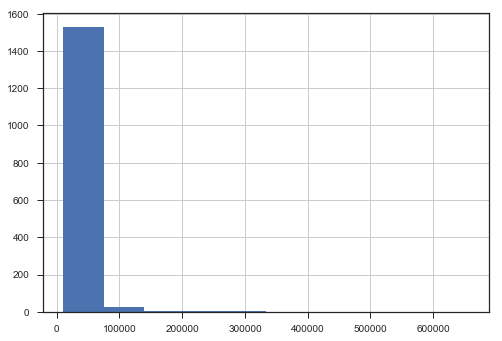

In [76]:
imdb.loc[imdb['cast_total_facebook_likes'] > 10000]['cast_total_facebook_likes'].hist()

## color

In [12]:
imdb['color'].value_counts(dropna=False)
# Note: There is a blank before "Black and White", need to remove it

Color               4815
 Black and White     209
NaN                   19
Name: color, dtype: int64

In [15]:
imdb['color'] = imdb['color'].str.strip()

In [16]:
imdb['color'].value_counts(dropna=False)

Color              4815
Black and White     209
NaN                  19
Name: color, dtype: int64

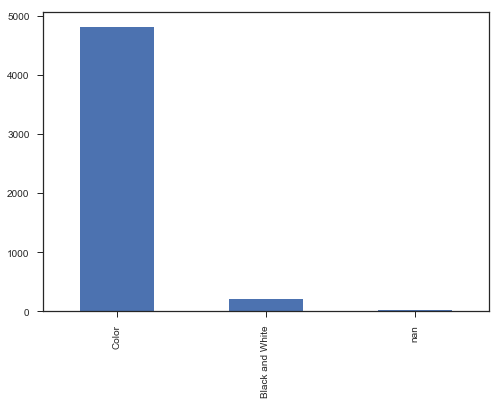

In [78]:
imdb['color'].value_counts(dropna=False).plot(kind="bar")

## content_rating

In [83]:
imdb['content_rating'].value_counts(dropna=False)

R            2118
PG-13        1461
PG            701
NaN           303
Not Rated     116
G             112
Unrated        62
Approved       55
TV-14          30
TV-MA          20
TV-PG          13
X              13
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y            1
TV-Y7           1
Name: content_rating, dtype: int64

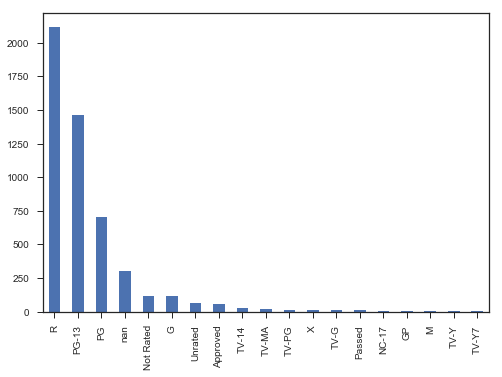

In [84]:
imdb['content_rating'].value_counts(dropna=False).plot(kind="bar")

## country

In [86]:
imdb['country'].value_counts(dropna=False)[:10]

USA          3807
UK            448
France        154
Canada        126
Germany        97
Australia      55
India          34
Spain          33
China          30
Japan          23
Name: country, dtype: int64

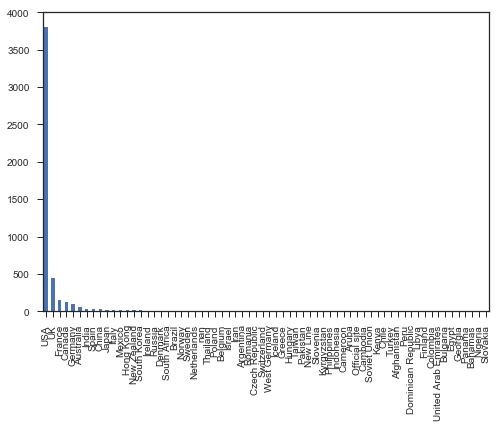

In [87]:
imdb['country'].value_counts(dropna=False).plot(kind="bar")

## director
### director_name

In [89]:
imdb['director_name'].value_counts(dropna=False)[:10]
# Why are there so many NaN?

NaN                  104
Steven Spielberg      26
Woody Allen           22
Clint Eastwood        20
Martin Scorsese       20
Ridley Scott          17
Spike Lee             16
Tim Burton            16
Steven Soderbergh     16
Renny Harlin          15
Name: director_name, dtype: int64

In [90]:
len(imdb['director_name'].unique())
# 2399 unique directors

2399

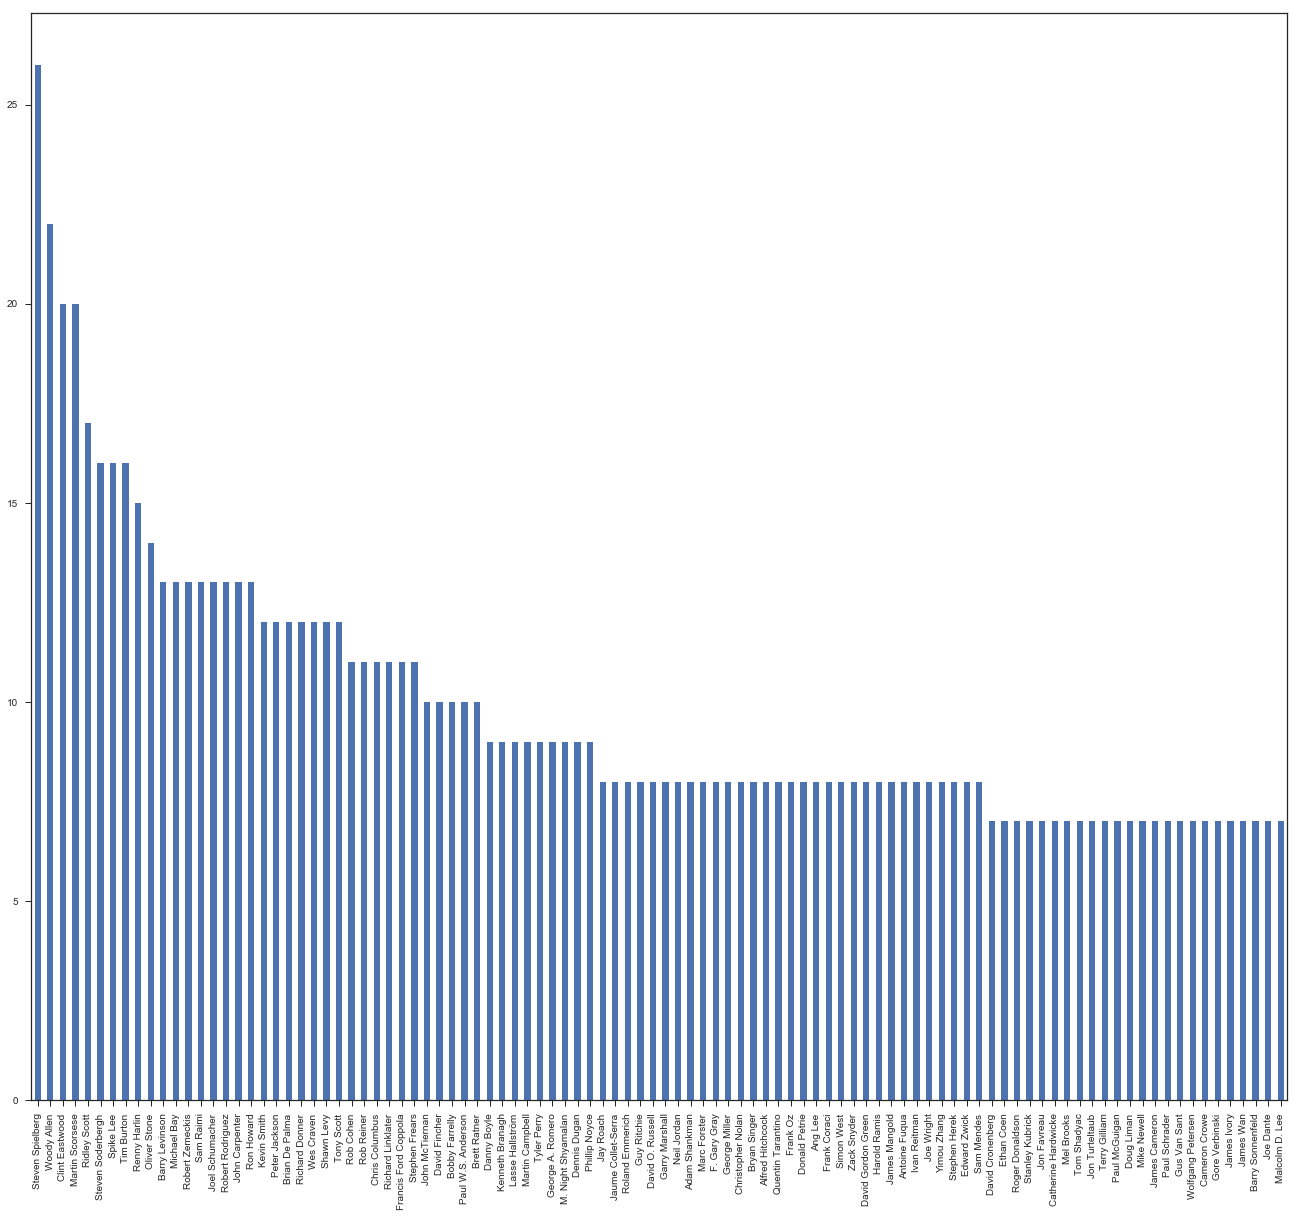

In [92]:
plt.figure(figsize=(25 * 0.9, 25 * 0.8))
imdb['director_name'].value_counts(dropna=True)[:100].plot(kind="bar")

### director_facebook_likes

In [93]:
imdb['director_facebook_likes'].describe()

count     4939.000000
mean       686.509212
std       2813.328607
min          0.000000
25%          7.000000
50%         49.000000
75%        194.500000
max      23000.000000
Name: director_facebook_likes, dtype: float64

In [94]:
len(imdb.loc[imdb['director_facebook_likes'] > 10000])

181

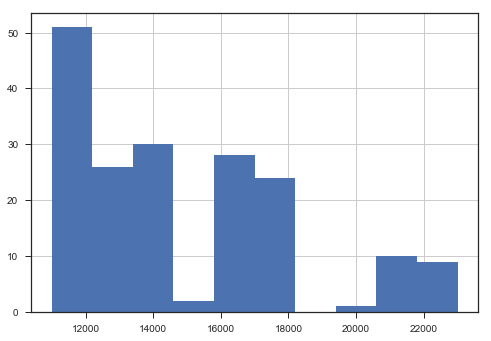

In [96]:
imdb.loc[imdb['director_facebook_likes'] > 10000]['director_facebook_likes'].hist()

### ==> Task to do <==
1. Most popular director on Facebook
2. Most popular actor_1 on Facebook

## duration

In [97]:
imdb['duration'].describe()

count    5028.000000
mean      107.201074
std        25.197441
min         7.000000
25%        93.000000
50%       103.000000
75%       118.000000
max       511.000000
Name: duration, dtype: float64

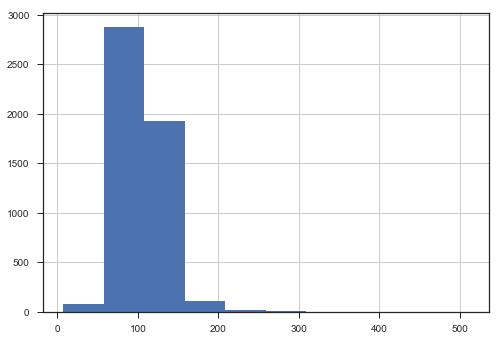

In [98]:
imdb['duration'].hist()

## facenumber_in_poster

In [99]:
imdb['facenumber_in_poster'].value_counts(dropna=False)

 0.0     2152
 1.0     1251
 2.0      716
 3.0      380
 4.0      207
 5.0      114
 6.0       76
 7.0       48
 8.0       37
 9.0       18
NaN        13
 10.0      10
 15.0       6
 11.0       5
 12.0       4
 13.0       2
 19.0       1
 14.0       1
 31.0       1
 43.0       1
Name: facenumber_in_poster, dtype: int64

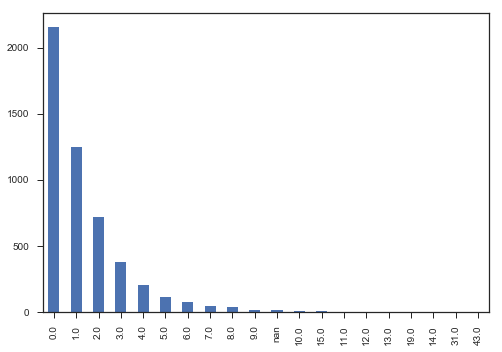

In [100]:
imdb['facenumber_in_poster'].value_counts(dropna=False).plot(kind="bar")

## genres

In [102]:
imdb['genres'].value_counts(dropna=False)[:10]

Drama                          236
Comedy                         209
Comedy|Drama                   191
Comedy|Drama|Romance           187
Comedy|Romance                 158
Drama|Romance                  152
Crime|Drama|Thriller           101
Horror                          71
Action|Crime|Drama|Thriller     68
Action|Crime|Thriller           65
Name: genres, dtype: int64

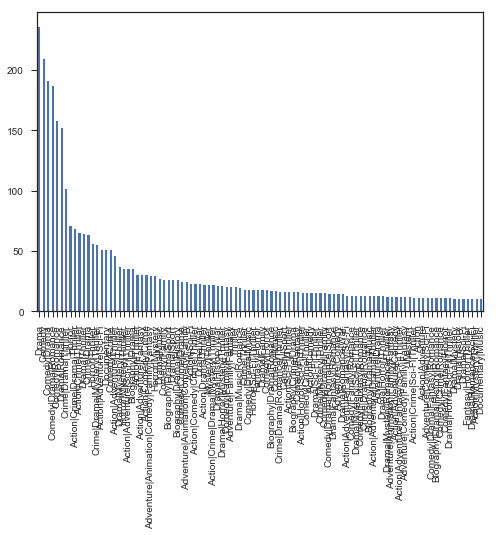

In [105]:
imdb['genres'].value_counts(dropna=False)[:100].plot(kind="bar")

In [45]:
genres = Counter([item for sublist in list(imdb['genres'].str.split('|')) for item in sublist])
genres = pd.DataFrame(genres.most_common()).set_index([0], drop=True)
del genres.index.name
genres.columns = ['Count']

In [46]:
genres

,Count
Drama,2594
Comedy,1872
Thriller,1411
Action,1153
Romance,1107
Adventure,923
Crime,889
Sci-Fi,616
Fantasy,610
Horror,565


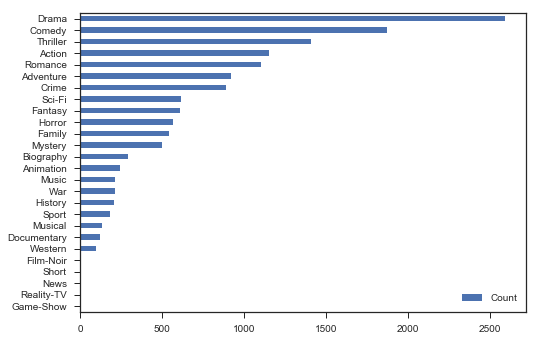

In [47]:
genres.plot(kind="barh").invert_yaxis()
plt.legend(loc='lower right')

## gross

In [3]:
imdb['gross'].describe()
# gross box office earnings of a movie in U.S. dollars

count    4.159000e+03
mean     4.846841e+07
std      6.845299e+07
min      1.620000e+02
25%      5.340988e+06
50%      2.551750e+07
75%      6.230944e+07
max      7.605058e+08
Name: gross, dtype: float64

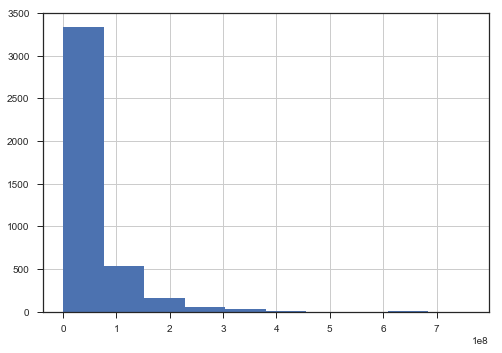

In [4]:
imdb['gross'].hist()

## imdb_score

In [5]:
imdb['imdb_score'].describe()

count    5043.000000
mean        6.442138
std         1.125116
min         1.600000
25%         5.800000
50%         6.600000
75%         7.200000
max         9.500000
Name: imdb_score, dtype: float64

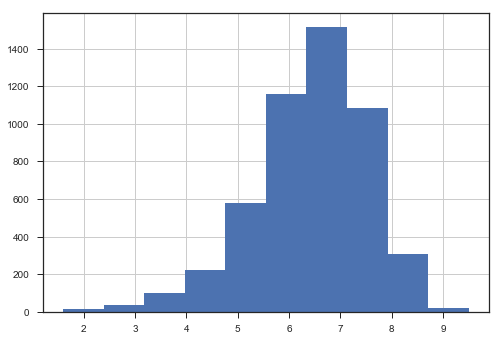

In [6]:
imdb['imdb_score'].hist()

## language

In [7]:
imdb['language'].value_counts(dropna=False)

English       4704
French          73
Spanish         40
Hindi           28
Mandarin        26
German          19
Japanese        18
NaN             12
Russian         11
Italian         11
Cantonese       11
Portuguese       8
Korean           8
Hebrew           5
Swedish          5
Danish           5
Arabic           5
Persian          4
Polish           4
Norwegian        4
Dutch            4
Thai             3
Chinese          3
Aboriginal       2
Dari             2
Indonesian       2
Zulu             2
Romanian         2
Icelandic        2
None             2
Swahili          1
Aramaic          1
Telugu           1
Mongolian        1
Hungarian        1
Tamil            1
Filipino         1
Kazakh           1
Czech            1
Kannada          1
Urdu             1
Dzongkha         1
Vietnamese       1
Slovenian        1
Panjabi          1
Maya             1
Bosnian          1
Greek            1
Name: language, dtype: int64

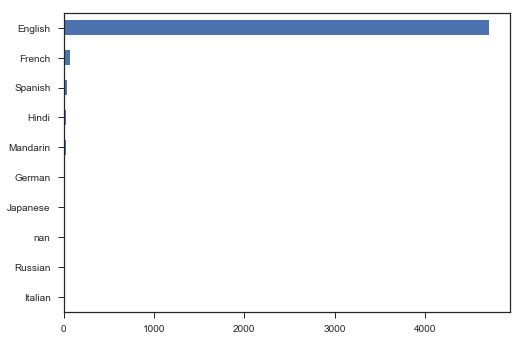

In [10]:
imdb['language'].value_counts(dropna=False)[:10].plot(kind="barh").invert_yaxis()

## movie_facebook_likes

In [11]:
imdb['movie_facebook_likes'].describe()

count      5043.000000
mean       7525.964505
std       19320.445110
min           0.000000
25%           0.000000
50%         166.000000
75%        3000.000000
max      349000.000000
Name: movie_facebook_likes, dtype: float64

In [12]:
len(imdb.loc[imdb['movie_facebook_likes'] > 10000])

1075

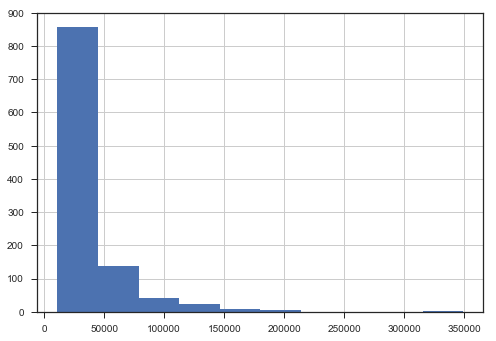

In [13]:
imdb.loc[imdb['movie_facebook_likes'] > 10000]['movie_facebook_likes'].hist()

## movie_imdb_link(just use it to scrape more info)

## movie_title

In [14]:
imdb['movie_title'].value_counts(dropna=False)
# There are a few names that have multiple movies

Halloween                               3
Pan                                     3
Home                                    3
Ben-Hur                                 3
Victor Frankenstein                     3
King Kong                               3
The Fast and the Furious                3
The Karate Kid                          2
Poltergeist                             2
The Legend of Tarzan                    2
The Gift                                2
Side Effects                            2
O                                       2
Godzilla Resurgence                     2
Murder by Numbers                       2
Carrie                                  2
Dawn of the Dead                        2
Aloha                                   2
The Possession                          2
Stealing Harvard                        2
The Last House on the Left              2
Hamlet                                  2
The Omen                                2
Unbroken                          

## num_critic_for_reviews

In [15]:
imdb['num_critic_for_reviews'].describe()

count    4993.000000
mean      140.194272
std       121.601675
min         1.000000
25%        50.000000
50%       110.000000
75%       195.000000
max       813.000000
Name: num_critic_for_reviews, dtype: float64

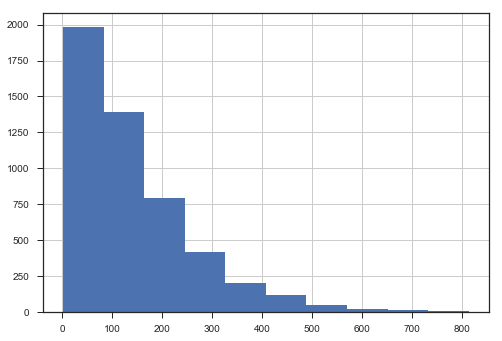

In [16]:
imdb['num_critic_for_reviews'].hist()

## num_user_for_reviews

In [17]:
imdb['num_user_for_reviews'].describe()

count    5022.000000
mean      272.770808
std       377.982886
min         1.000000
25%        65.000000
50%       156.000000
75%       326.000000
max      5060.000000
Name: num_user_for_reviews, dtype: float64

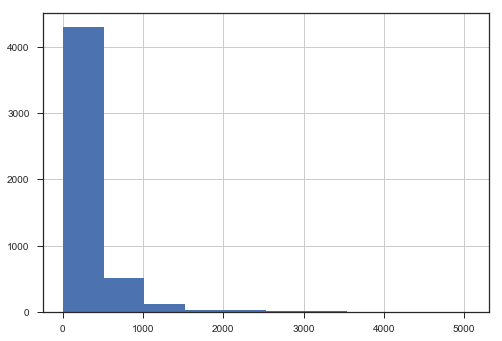

In [18]:
imdb['num_user_for_reviews'].hist()

## num_voted_users

In [19]:
imdb['num_voted_users'].describe()

count    5.043000e+03
mean     8.366816e+04
std      1.384853e+05
min      5.000000e+00
25%      8.593500e+03
50%      3.435900e+04
75%      9.630900e+04
max      1.689764e+06
Name: num_voted_users, dtype: float64

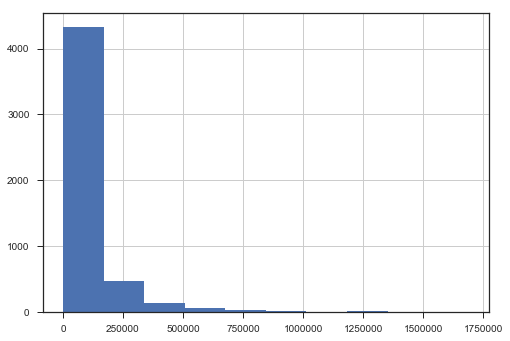

In [20]:
imdb['num_voted_users'].hist()

## plot_keywords

In [22]:
imdb['plot_keywords'].value_counts(dropna=False)[:10]

NaN                                                                                  153
based on novel                                                                         4
halloween|masked killer|michael myers|slasher|trick or treat                           3
animal name in title|ape abducts a woman|gorilla|island|king kong                      3
alien friendship|alien invasion|australia|flying car|mother daughter relationship      3
one word title                                                                         3
assistant|experiment|frankenstein|medical student|scientist                            3
1940s|child hero|fantasy world|orphan|reference to peter pan                           3
eighteen wheeler|illegal street racing|truck|trucker|undercover cop                    3
athlete|extreme sports|fbi|fbi agent|heist                                             2
Name: plot_keywords, dtype: int64

In [31]:
plot_keywords = Counter([item for sublist in list(imdb['plot_keywords'].str.split('|')) if sublist is not np.nan for item in sublist])
plot_keywords = pd.DataFrame(plot_keywords.most_common()).set_index([0], drop=True)
del plot_keywords.index.name
plot_keywords.columns = ['Count']

In [33]:
plot_keywords.head(10)

,Count
love,198
friend,166
murder,161
death,132
police,126
new york city,91
high school,89
alien,82
school,73
boy,72


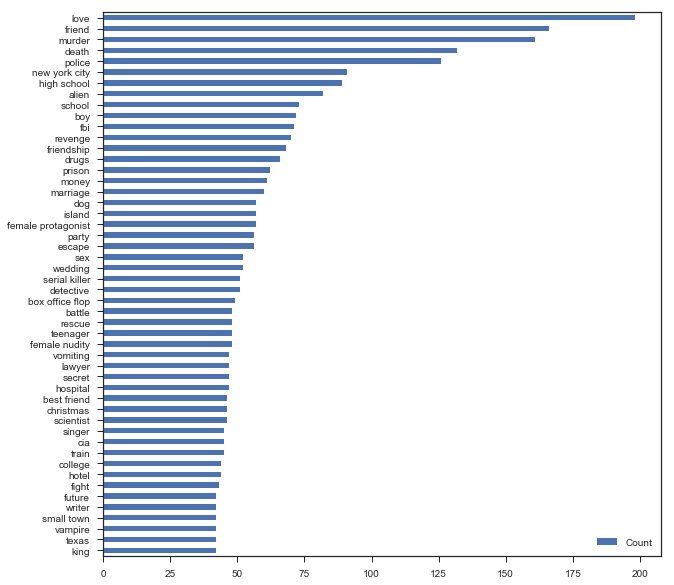

In [44]:
plot_keywords.head(50).plot(kind="barh", figsize=(10,10)).invert_yaxis()
plt.legend(loc='lower right')

## title_year

In [48]:
imdb['title_year'].value_counts(dropna=False)

 2009.0    260
 2014.0    252
 2006.0    239
 2013.0    237
 2010.0    230
 2015.0    226
 2008.0    225
 2011.0    225
 2005.0    221
 2012.0    221
 2004.0    214
 2002.0    209
 2007.0    204
 2001.0    188
 2000.0    171
 2003.0    169
 1999.0    168
 1998.0    134
 1997.0    118
NaN        108
 2016.0    106
 1996.0     99
 1995.0     70
 1994.0     54
 1993.0     48
 1992.0     34
 1981.0     33
 1989.0     33
 1987.0     32
 1984.0     31
          ... 
 1960.0      3
 1951.0      3
 1948.0      3
 1946.0      3
 1939.0      3
 1959.0      3
 1956.0      3
 1947.0      3
 1955.0      2
 1936.0      2
 1929.0      2
 1949.0      2
 1957.0      2
 1933.0      2
 1937.0      2
 1942.0      2
 1938.0      2
 1941.0      1
 1925.0      1
 1932.0      1
 1920.0      1
 1934.0      1
 1950.0      1
 1943.0      1
 1916.0      1
 1930.0      1
 1944.0      1
 1958.0      1
 1935.0      1
 1927.0      1
Name: title_year, Length: 92, dtype: int64

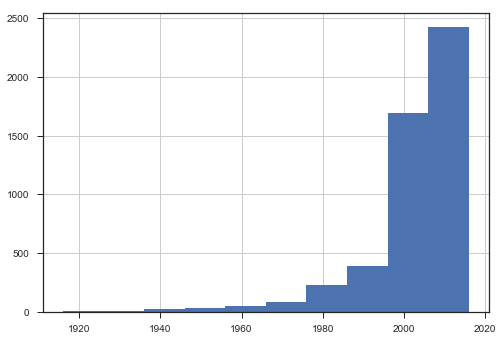

In [49]:
imdb['title_year'].hist()

## ==>Task to do<==
1. Verify if aspect_ratio is not consistent with title_year
2. Write a Python class to automate the EDA process?